# Задание 03 
## Конфигурационная модель

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
import networkx as nx

Конфигурационная модель - генератор случайной сети с заданным распределением степеней вершин. Алгоритм заключается в следующих шагах: 
* каждой  вершине $i$ графа  присваивается $k_i$ «полуребер»;
* из   последовательности таких «полуребер» случайным образом выбирается пара и соответствующие вершины $i$ и $j$ соединяются ребром; 
* предыдущий  шаг  повторяется  до  тех пор,  все ребра не будут задействованы.
![](config01.png)


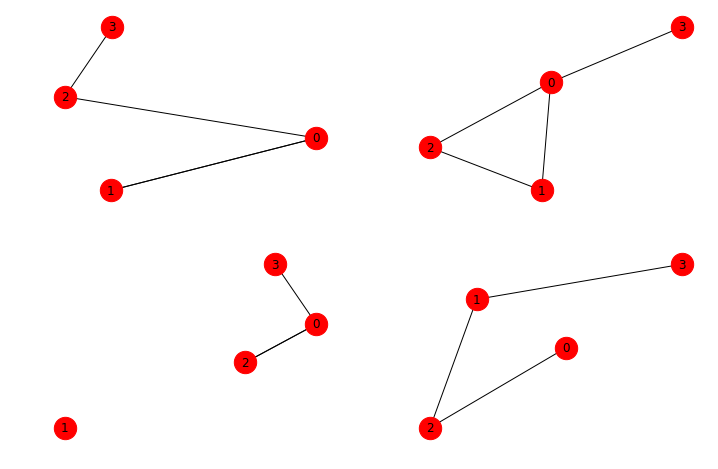

In [2]:
degrees=[3,2,2,1]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))

plt.subplot(221)
G=nx.configuration_model(degrees,seed=5)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)

plt.subplot(222)
G=nx.configuration_model(degrees,seed=10)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)

plt.subplot(223)
G=nx.configuration_model(degrees,seed=28)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)

plt.subplot(224)
G=nx.configuration_model(degrees,seed=115)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)


In [3]:
print(list(G.edges()))
print(list(G.selfloop_edges())) #все петли

[(0, 0), (0, 2), (1, 3), (1, 2)]
[(0, 0)]


### Топология конфигурационной сети:
Ожидаемое число мультиребер:
$$
M=\frac{1}{2} \left(\frac{\langle k^2\rangle-\langle k\rangle}{\langle k\rangle}\right)^2,
$$
Ожидаемое число петель: 
$$
S=\frac{\langle k^2\rangle-\langle k\rangle}{2\langle k\rangle},
$$

Коэффициент кластеризации: 

$$
C=\frac{1}{N} \frac{(\langle k^2\rangle-\langle k\rangle)^2}{\langle k\rangle^3},
$$


#### Задача 1.  Конфигурационная модель сетей со степенным распределением
* напишите функции, вычисляющие по заданному массиву степеней теоретические (ожидаемые) значения числа мультиребер, петель и коэффициент кластеризации;

In [3]:
#def 

* напишите функции, вычисляющие число мультиребер, число петель и средний коэффициент кластеризации для заданного мультиграфа; 

In [6]:
#def

* сгенерируйте значения степеней вершин из степенного распределения для различных значений $\gamma \in \left[2.0, 3.0\right]$. Для этих распределений выведите теоретические (ожидаемые) значения числа мультиребер M, петель S и коэффициента кластеризации C, постройте по заданному массиву степеней конфигурационную модель, вычислите наблюдаемые для полученного графа значения M,S,C. Объясните полученные результаты.

Для генерации массива степеней воспользуйтесь функцией (используется [метод обратного преобразования](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F)):

In [5]:
def power_law(gamma,x_min=2,size=1000): #size - размер массива
    x=np.zeros(size,dtype=int)
    for i in range(size):
        r=np.random.random()
        x[i]=int(x_min*np.float_power((r),1/(-gamma+1)))
    return x

In [10]:
print(power_law(2,size=10))

[ 2  2 11  2  2  4  3  2  2  2]


#### Задание 2. Распределение степеней ближайших соседей
 * Пусть $\gamma=3$, сгенерируйте массив степеней из степенного распределения, постройте несколько конфигурационных моделей для полученного массива;
 * для каждой вершины определите степени её ближайших соседей, объедините все значения в один массив и постройте распределение степеней. Определите среднее и дисперсию, отличаются ли они от среднего значения степени  вршин в сети и дисперсии? Объясните результаты. 

#### Задача 2. Конфигурационная модель сложной сети 
* постройте конфигурационную модель сети заболеваний;
* сравните топологические характеристики сложной сети и ее конфигурационной модели: коэффициент кластеризации, транзитивность, средний кратчайший путь.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [51]:
G=nx.read_edgelist('bio-diseasome.txt')